# Getting oriented

This notebook contains some simple notes and small tests, carried out, in order to get oriented with the data and method involved in this project

In [34]:
import pandas as pd
import numpy as np


In [35]:
# Data set is containted in the same path, in the archive folder
dataset = pd.read_csv("archive/creditcard.csv")

In [36]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:

import matplotlib.pyplot as plt

0    284315
1       492
Name: Class, dtype: int64
as a percentage of the whole dataset
0    99.827251
1     0.172749
Name: Class, dtype: float64


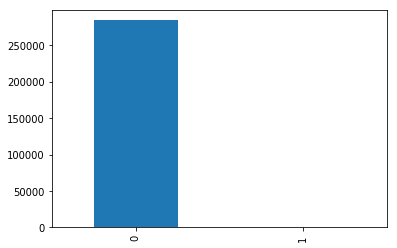

In [38]:
# Having a look at how many samples are fraudulent and how many are nnot

#flag = dataset.class.unique()
fig, ax = plt.subplots()
print(dataset.Class.value_counts())
print("as a percentage of the whole dataset")
print((dataset.Class.value_counts()*100)/ len(dataset))
dataset.Class.value_counts().plot(ax=ax, kind='bar')

##### Looking at how skewed the dataset is, is worth noting. This will give us even more motivation for cross validation, when we come to write about it

## Now I want to have a look at some of the distributions of the features

In [39]:
def meanANDstd(feature):
    
    mean = np.mean(feature)
    std = np.std(feature)
    #print(mean, std)
    return mean, std


In [40]:
testmean , testSTd = meanANDstd(dataset.V1)

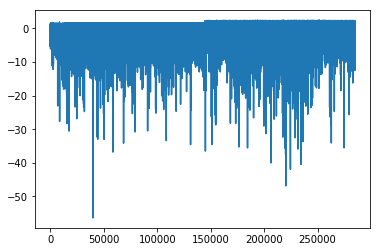

In [41]:
dataset.V1.plot()

### Trying out some simple scaling

z = (x - u) / s

where x is the instace value, u is the mean, and s is the std

In [42]:
def normiMachine( sample, mean, std):
    return (sample - mean) / std

In [43]:
#creating a copy of the dataframe where I will store normised versions
dataNorm = dataset.copy()

In [44]:
#meanV1 , stdV1 = meanANDstd(dataset.V1)

#dataNorm.V1 =dataset.V1.apply(normiMachine, args=(meanV1, stdV1))

In [45]:
dataset.columns.tolist()[0]

'Time'

In [46]:
for col in dataNorm.columns.tolist():
    mean, std = meanANDstd(dataNorm[col])

    dataNorm[col] =dataNorm[col].apply(normiMachine, args=(mean, std))

In [47]:
dataNorm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,-0.041599
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,-0.041599
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,-0.041599
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,-0.041599
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,-0.041599


In [48]:
# just wanted to make sure that the mean came close to 0,  and std close to 1s

In [49]:
print("mean,std")

for col in dataNorm.columns.tolist():
    mean, std = meanANDstd(dataNorm[col])
    print(mean,std)



mean,std
-1.1504300418553255e-14 1.0000000000000133
-2.263246277900502e-15 0.999999999999998
-1.860365775757046e-16 1.0000000000000353
1.9013407888201706e-16 0.9999999999999983
-1.2499566338828806e-15 0.9999999999999912
1.4710335634249372e-15 0.99999999999999
-8.201259158125939e-17 1.000000000000006
-4.475632493208128e-17 1.0000000000000024
4.712231265287549e-17 1.000000000000004
1.0645668096439025e-15 1.000000000000007
4.463552097876155e-16 0.9999999999999978
2.4660035707817974e-15 1.0000000000000102
2.5318467442210106e-15 0.9999999999999997
-9.311568916793088e-16 1.0000000000000062
-9.948287417223134e-16 0.9999999999999973
-5.971743554248568e-17 1.0000000000000115
-9.753681565025508e-17 0.9999999999999992
1.2223621496958072e-15 1.000000000000007
3.1498607561333194e-16 1.0000000000000033
-1.7545166229025263e-16 1.000000000000006
4.2348607417150635e-16 1.0000000000000155
7.262309553862485e-17 1.0000000000000133
-3.4255112869851545e-16 1.000000000000008
-1.1791339031664796e-15 1.0000000

## Having a look at pearson


In [50]:
def pearson1(dataColX, dataColY):
    meanx = np.mean(dataColX)
    meany = np.mean(dataColY)
    numerator = 0
    denumerator1 =0
    denumerator2 =0
    
    
## assuming cols of equal size
    for i in range(len(dataColX)):
        diffX = (dataColX[i]- meanx)
        diffY = (dataColY[i]-meany)
        numerator = numerator + (diffX*diffY)
        denumerator1= denumerator1 + (diffX*diffX)
        denumerator2= denumerator2 + (diffY*diffY)

    return numerator / (np.sqrt(denumerator1*denumerator2))

In [52]:
CorMat = np.zeros((len(dataNorm.columns), len(dataNorm.columns)))

for i in range(len(dataNorm.columns.tolist())):
    print(i)
    dataX = dataNorm.iloc[:,i]
    for j in range(len(dataNorm.columns.tolist())):
        print("j:",j)
        
        dataY =dataNorm.iloc[:,j]
        CorMat[i,j] = pearson1(dataX, dataY)
        
        
        

0
j: 0
j: 1
j: 2
j: 3
j: 4
j: 5
j: 6
j: 7
j: 8
j: 9
j: 10
j: 11
j: 12
j: 13
j: 14
j: 15
j: 16
j: 17
j: 18
j: 19
j: 20
j: 21
j: 22
j: 23
j: 24
j: 25
j: 26
j: 27
j: 28
j: 29
j: 30
1
j: 0
j: 1
j: 2
j: 3
j: 4
j: 5
j: 6
j: 7
j: 8
j: 9
j: 10
j: 11
j: 12
j: 13
j: 14
j: 15
j: 16
j: 17
j: 18
j: 19
j: 20
j: 21
j: 22
j: 23
j: 24
j: 25
j: 26
j: 27
j: 28
j: 29
j: 30
2
j: 0
j: 1
j: 2
j: 3
j: 4
j: 5
j: 6
j: 7
j: 8
j: 9
j: 10
j: 11
j: 12
j: 13
j: 14
j: 15
j: 16
j: 17
j: 18
j: 19
j: 20
j: 21
j: 22
j: 23
j: 24
j: 25
j: 26
j: 27
j: 28
j: 29
j: 30
3
j: 0
j: 1
j: 2
j: 3
j: 4
j: 5
j: 6
j: 7
j: 8
j: 9
j: 10
j: 11
j: 12
j: 13
j: 14
j: 15
j: 16
j: 17
j: 18
j: 19
j: 20
j: 21
j: 22
j: 23
j: 24
j: 25
j: 26
j: 27
j: 28
j: 29
j: 30
4
j: 0
j: 1
j: 2
j: 3
j: 4
j: 5
j: 6
j: 7
j: 8
j: 9
j: 10
j: 11
j: 12
j: 13
j: 14
j: 15
j: 16
j: 17
j: 18
j: 19
j: 20
j: 21
j: 22
j: 23
j: 24
j: 25
j: 26
j: 27
j: 28
j: 29
j: 30
5
j: 0
j: 1
j: 2
j: 3
j: 4
j: 5
j: 6
j: 7
j: 8
j: 9
j: 10
j: 11
j: 12
j: 13
j: 14
j: 15
j: 16
j: 17
j: 18
j: 1

In [53]:
CorMat

array([[ 1.00000000e+00,  1.17396306e-01, -1.05933271e-02,
        -4.19618172e-01, -1.05260205e-01,  1.73072123e-01,
        -6.30164704e-02,  8.47143748e-02, -3.69494347e-02,
        -8.66043370e-03,  3.06166286e-02, -2.47689437e-01,
         1.24348068e-01, -6.59020237e-02, -9.87568192e-02,
        -1.83453273e-01,  1.19028677e-02, -7.32972133e-02,
         9.04381325e-02,  2.89753026e-02, -5.08660185e-02,
         4.47357263e-02,  1.44059055e-01,  5.11423649e-02,
        -1.61818685e-02, -2.33082791e-01, -4.14071006e-02,
        -5.13459112e-03, -9.41268818e-03, -1.05963734e-02,
        -1.23225709e-02],
       [ 1.17396306e-01,  1.00000000e+00,  4.51503825e-16,
         3.45568206e-16,  1.46092481e-16, -2.38699196e-16,
         2.49491934e-18,  2.79418297e-16,  1.79373600e-16,
        -4.37209544e-16, -2.16800996e-17,  2.48645253e-16,
        -1.30335732e-16,  1.88746432e-17,  2.03594520e-16,
        -3.03389186e-16,  7.07194587e-16, -1.08252563e-16,
         8.11395501e-17,  1.55

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

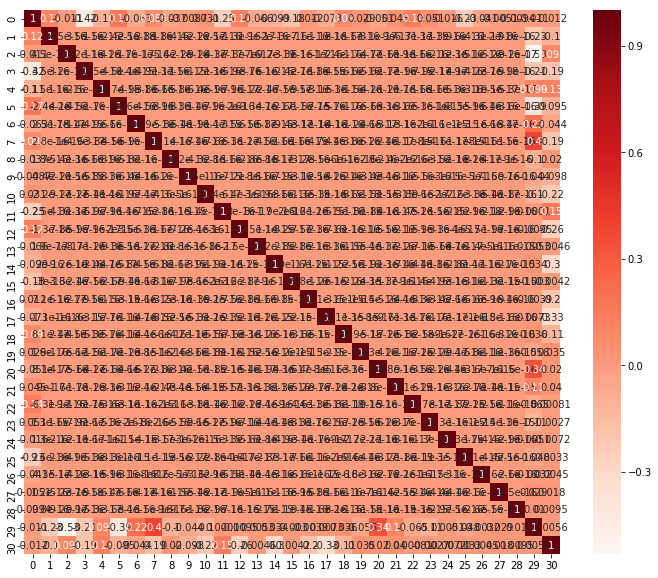

In [55]:
plt.figure(figsize=(12,10))
sns.heatmap(CorMat, annot=True,cmap=plt.cm.Reds)

In [68]:
storedMatirx = pd.DataFrame(CorMat, columns=dataNorm.columns.tolist(), index=dataNorm.columns.tolist())

In [72]:
storedMatirx.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.515038e-16,3.455682e-16,1.460925e-16,-2.386992e-16,2.494919e-18,2.794183e-16,1.793736e-16,-4.372095e-16,...,-9.009859e-17,-6.317347e-17,1.327904e-15,1.255557e-16,9.575731e-16,-4.294310e-17,1.220459e-16,9.834795e-16,-0.227709,-0.101347
V2,-0.010593,4.515038e-16,1.000000e+00,3.169215e-16,1.081734e-16,4.232814e-16,1.727267e-17,-9.950772e-17,-5.436610e-16,-2.152963e-16,...,-1.600084e-16,1.867083e-16,1.615411e-16,-2.083391e-16,2.335086e-16,5.121638e-16,-5.173335e-16,-9.162824e-17,-0.531409,0.091289
V3,-0.419618,3.455682e-16,3.169215e-16,1.000000e+00,-2.467075e-16,-4.488194e-16,1.416334e-15,-4.851142e-17,1.268098e-16,1.502224e-15,...,-1.673712e-16,-1.865160e-15,-7.907533e-17,-2.050806e-17,4.875250e-16,-4.248054e-16,3.651808e-18,9.948634e-16,-0.210880,-0.192961
V4,-0.105260,1.460925e-16,1.081734e-16,-2.467075e-16,1.000000e+00,-1.722861e-15,-4.938995e-16,-3.823660e-16,6.617117e-16,5.837466e-16,...,-1.177445e-16,1.728181e-16,1.560795e-16,1.550817e-16,5.315039e-16,-3.149662e-16,9.473478e-17,-5.268511e-17,0.098732,0.133447


In [69]:
storedMatirx.to_csv(r'CorrelationMatrix.csv', index = False)

In [78]:
cor_target = abs(storedMatirx['V1'])

relevant_features = cor_target[cor_target>0.01]
relevant_features


Time      0.117396
V1        1.000000
Amount    0.227709
Class     0.101347
Name: V1, dtype: float64

In [71]:
print(relevant_features)

V1    1.0
Name: V1, dtype: float64


In [81]:
for col in storedMatirx.columns.tolist():
    cor_target = abs(storedMatirx[col])

    relevant_features = cor_target[cor_target>0.1]
    print('*********'+ col + "***********")
    print(relevant_features)
    #print('*********')

    

*********Time***********
Time    1.000000
V1      0.117396
V3      0.419618
V4      0.105260
V5      0.173072
V11     0.247689
V12     0.124348
V15     0.183453
V22     0.144059
V25     0.233083
Name: Time, dtype: float64
*********V1***********
Time      0.117396
V1        1.000000
Amount    0.227709
Class     0.101347
Name: V1, dtype: float64
*********V2***********
V2        1.000000
Amount    0.531409
Name: V2, dtype: float64
*********V3***********
Time      0.419618
V3        1.000000
Amount    0.210880
Class     0.192961
Name: V3, dtype: float64
*********V4***********
Time     0.105260
V4       1.000000
Class    0.133447
Name: V4, dtype: float64
*********V5***********
Time      0.173072
V5        1.000000
Amount    0.386356
Name: V5, dtype: float64
*********V6***********
V6        1.000000
Amount    0.215981
Name: V6, dtype: float64
*********V7***********
V7        1.000000
Amount    0.397311
Class     0.187257
Name: V7, dtype: float64
*********V8***********
V8        1.000000
Amou

## Trying a simple example to shed light on the nature of our dataset


Ok, so when looking at our data set, we will note a large amount of non fraudulent samples, when compared to fraudulent ones. This is not only in the nature of the dataset, but probably in the nature of the transactions we are dealing with.

In this example, we look at the very simple case, of what would happen if our model, just outouts that the transaction was non fraudulent, hence the "ZeroMachine".
Ps. this model requiers no training/ fitting.

In [88]:
def ZeroMachine(self):
    return 0

In [90]:
dataset['Zeros'] =dataset.Class.apply(ZeroMachine)


In [97]:
import sklearn.metrics  as met

In [102]:
metrics = met.classification_report(dataset.Class, dataset.Zeros,  digits=5)

/home/lara/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lara/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lara/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [103]:
print(metrics)

              precision    recall  f1-score   support

           0    0.99827   1.00000   0.99914    284315
           1    0.00000   0.00000   0.00000       492

    accuracy                        0.99827    284807
   macro avg    0.49914   0.50000   0.49957    284807
weighted avg    0.99655   0.99827   0.99741    284807

